In [1]:
pip install highlight-text

In [2]:
from PIL import Image
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
import matplotlib.patheffects as path_effects

In [ ]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

Goals scored

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import urllib
from highlight_text import HighlightText, ax_text, fig_text

In [23]:
data=pd.read_html("https://www.espn.com/soccer/standings/_/league/ENG.1/season/2022")[1]

In [24]:
#
names=pd.read_html("https://www.espn.com/soccer/standings/_/league/ENG.1/season/2022")[0]

In [25]:
names

,2022-2023
0,1MNCManchester City
1,2ARSArsenal
2,3MANManchester United
3,4NEWNewcastle United
4,5LIVLiverpool
5,6BHABrighton & Hove Albion
6,7AVLAston Villa
7,8TOTTottenham Hotspur
8,9BREBrentford
9,10FULFulham


In [26]:
def clean_names(name):
    try :
        int(name[:2])
        return name[5:]
    except:
        return name[4:]

In [27]:
names

,2022-2023
0,1MNCManchester City
1,2ARSArsenal
2,3MANManchester United
3,4NEWNewcastle United
4,5LIVLiverpool
5,6BHABrighton & Hove Albion
6,7AVLAston Villa
7,8TOTTottenham Hotspur
8,9BREBrentford
9,10FULFulham


In [28]:
data["CLUB"]=names["2022-2023"].apply(clean_names)
data["POS"]=data.index+1

In [29]:
data

,GP,W,D,L,F,A,GD,P,CLUB,POS
0,38,28,5,5,94,33,61,89,Manchester City,1
1,38,26,6,6,88,43,45,84,Arsenal,2
2,38,23,6,9,58,43,15,75,Manchester United,3
3,38,19,14,5,68,33,35,71,Newcastle United,4
4,38,19,10,9,75,47,28,67,Liverpool,5
5,38,18,8,12,72,53,19,62,Brighton & Hove Albion,6
6,38,18,7,13,51,46,5,61,Aston Villa,7
7,38,18,6,14,70,63,7,60,Tottenham Hotspur,8
8,38,15,14,9,58,46,12,59,Brentford,9
9,38,15,7,16,55,53,2,52,Fulham,10


In [30]:
data=data[["CLUB","GD"]]

In [31]:
data=data[data["GD"]>0]

In [32]:
data=data.sort_values(by="GD", ascending=False)

In [103]:
data["club_logo"]=["8456_xsmall.png","9825_xsmall.png","10261_xsmall.png","8650_xsmall.png","10204_xsmall.png","10260_xsmall.png","9937_xsmall.png","8586_xsmall.png","10252_xsmall.png","9879_xsmall.png"]

In [104]:
data=data.reset_index()

In [105]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

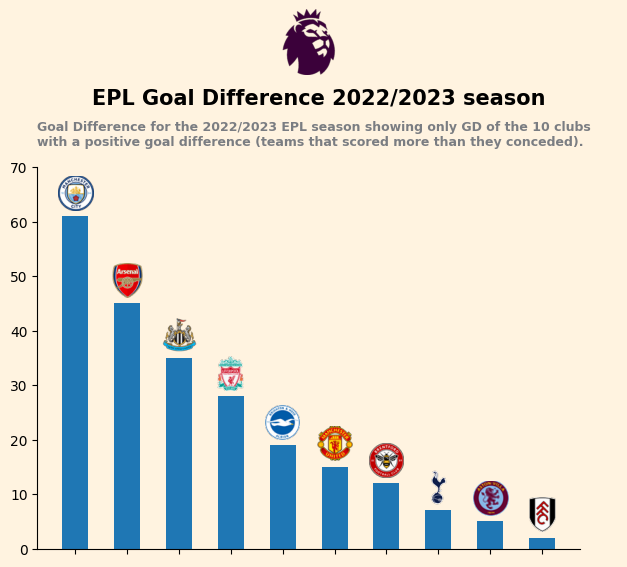

In [106]:
fig = plt.figure(figsize = (7,7),facecolor = "#fff3e0")
layout = [["logo"] * 5,
          ["text"] * 5,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5]

ax_dict = fig.subplot_mosaic(
    layout
)

#add epl logo
epl_url="https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
league_icon=Image.open(urllib.request.urlopen(epl_url))

#add logo axes
ax_dict["logo"].imshow(league_icon)
ax_dict["logo"].axis("off")


#add title


ax_dict["text"].annotate(
    xy = (0.1, 0.85),
    text = "EPL Goal Difference 2022/2023 season",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 15
)
ax_dict["text"].annotate(
    xy = (0, 0.3),
    text = "Goal Difference for the 2022/2023 EPL season showing only GD of the 10 clubs      \nwith a positive goal difference (teams that scored more than they conceded).",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 9,
    color="#7a7d82"
)

ax_dict["text"].axis("off")

#bar chart
width=0.5
ax_dict["bar"].bar(data["CLUB"],data["GD"],width = 0.5)

# Adjust ticks

ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor("#fff3e0")
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,70)

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))


fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, height in enumerate(data["GD"]):
    ax_coords = DC_to_NFC([index - width/1.5, height+1])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.05, 0.05])
    logo_name=data["club_logo"][index]
    club_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/teamlogo/{logo_name}"))#.convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")


In [88]:
data

,CLUB,GD,club_logo
0,Manchester City,61,8456_xsmall.png
1,Arsenal,45,9825_xsmall.png
3,Newcastle United,35,10261_xsmall.png
4,Liverpool,28,8650_xsmall.png
5,Brighton & Hove Albion,19,10204_xsmall.png
2,Manchester United,15,10260_xsmall.png
8,Brentford,12,10252_xsmall.png
7,Tottenham Hotspur,7,8586_xsmall.png
6,Aston Villa,5,10252_xsmall.png
9,Fulham,2,9879_xsmall.png
